In [58]:
from fastai.tabular.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('../datasets/final_df/crime_total.csv') #read in dataframe

In [128]:
df.dispatch_date = pd.to_datetime(df.dispatch_date) # make categoricals
df.zipcode = df.zipcode.astype(int)
df.year = df.dispatch_date.dt.year.astype(int)
df['month']= df.dispatch_date.dt.month.astype(int)

#df.to_csv('../datasets/final_df/crime_total.csv',index=False)

In [129]:
df['time_delta'] = df.index.values

In [130]:
list(df.columns)

['zipcode',
 'dispatch_date',
 'text_general_code_Aggravated Assault Firearm',
 'text_general_code_Aggravated Assault No Firearm',
 'text_general_code_All Other Offenses',
 'text_general_code_Arson',
 'text_general_code_Burglary Non-Residential',
 'text_general_code_Burglary Residential',
 'text_general_code_DRIVING UNDER THE INFLUENCE',
 'text_general_code_Disorderly Conduct',
 'text_general_code_Embezzlement',
 'text_general_code_Forgery and Counterfeiting',
 'text_general_code_Fraud',
 'text_general_code_Gambling Violations',
 'text_general_code_Liquor Law Violations',
 'text_general_code_Narcotic / Drug Law Violations',
 'text_general_code_Offenses Against Family and Children',
 'text_general_code_Other Assaults',
 'text_general_code_Other Sex Offenses (Not Commercialized)',
 'text_general_code_Prostitution and Commercialized Vice',
 'text_general_code_Public Drunkenness',
 'text_general_code_Rape',
 'text_general_code_Receiving Stolen Property',
 'text_general_code_Robbery Firearm

In [131]:
df = df.drop(columns = ['dispatch_date'])

In [132]:
crimecols = ['text_general_code_Aggravated Assault Firearm',
 'text_general_code_Aggravated Assault No Firearm',
 'text_general_code_All Other Offenses',
 'text_general_code_Arson',
 'text_general_code_Burglary Non-Residential',
 'text_general_code_Burglary Residential',
 'text_general_code_DRIVING UNDER THE INFLUENCE',
 'text_general_code_Disorderly Conduct',
 'text_general_code_Embezzlement',
 'text_general_code_Forgery and Counterfeiting',
 'text_general_code_Fraud',
 'text_general_code_Gambling Violations',
 'text_general_code_Liquor Law Violations',
 'text_general_code_Narcotic / Drug Law Violations',
 'text_general_code_Offenses Against Family and Children',
 'text_general_code_Other Assaults',
 'text_general_code_Other Sex Offenses (Not Commercialized)',
 'text_general_code_Prostitution and Commercialized Vice',
 'text_general_code_Public Drunkenness',
 'text_general_code_Rape',
 'text_general_code_Receiving Stolen Property',
 'text_general_code_Robbery Firearm',
 'text_general_code_Robbery No Firearm',
 'text_general_code_Theft from Vehicle',
 'text_general_code_Thefts',
 'text_general_code_Vagrancy/Loitering',
 'text_general_code_Vandalism/Criminal Mischief',
 'text_general_code_Weapon Violations','num_crimes','month','year']

cats = ['zipcode']
#const = df.columns.tolist().remove(cats)
const = [x for x in df.columns.tolist() if x not in cats]
const = [e for e in const if e not in crimecols]


In [133]:
const

['hour_0',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'num_art',
 'num_fm',
 'num_parks',
 'num_landmark',
 'Youth Center',
 'Zoo',
 'Theatre',
 'Social Services',
 'Sports Complex',
 'Recreation Building',
 'Recreation Center',
 'Museum',
 'Monument',
 'Ice Rink',
 'Historic',
 'Historic Landmark',
 'Garden',
 'Cultural',
 'num_housingcouncil',
 'num_nac_office',
 'num_nac',
 'num_pools',
 'num_spraygrounds',
 'num_playstreets',
 'num_playgrounds',
 'agi_code',
 'n_single_returns',
 'n_joint_returns',
 'num_dep',
 'agi',
 'total_wages',
 'salaries',
 'num_unemployment',
 'amt_unemployment',
 'num_tuition_tax',
 'amt_tuition_tax',
 'num_education_credit',
 'amt_education_credit',
 'num_schools',
 'TYPE_SPECIFIC_ARCHDIOCESE',
 'TYPE_SPECIFIC_CHARTER',
 'TYPE_SPECIFI

In [134]:
dls = TabularDataLoaders.from_df(df, y_names="num_crimes",
    cat_names = cats,
    cont_names = const,
    procs = [Categorify, FillMissing, Normalize])

In [135]:
dls

In [136]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))


In [137]:
splits

((#17753) [21909,5350,18829,12369,20477,6119,15676,7585,4460,11013...],
 (#4438) [18759,9270,3797,7786,15464,8506,8830,4580,2702,8159...])

In [138]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],cat_names = cats,cont_names = const,
                   y_names="num_crimes", splits=splits)


In [139]:
dls = to.dataloaders(bs=64)

In [140]:
dls.show_batch()

,zipcode,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,num_art,num_fm,num_parks,num_landmark,Youth Center,Zoo,Theatre,Social Services,Sports Complex,Recreation Building,Recreation Center,Museum,Monument,Ice Rink,Historic,Historic Landmark,Garden,Cultural,num_housingcouncil,num_nac_office,num_nac,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,agi_code,n_single_returns,n_joint_returns,num_dep,agi,total_wages,salaries,num_unemployment,amt_unemployment,num_tuition_tax,amt_tuition_tax,num_education_credit,amt_education_credit,num_schools,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,text_general_code_Robbery,text_general_code_Burglary,text_general_code_Aggravated Assault,num_community_programs,time_delta,num_crimes
0,19147,2.000000e+00,8.0,6.0,11.0,1.400000e+01,14.0,8.000000e+00,4.000000e+00,9.0,9.0,7.0,4.0,9.999999e-01,7.0,8.0,3.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,3.0,10.0,4.000000e+00,2.000000e+00,32.000001,146.000000,9.176328e-10,4.923417e-08,3.000000e+00,4.522623e-08,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.453578e-10,2.000000e+00,3.336913e-09,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,-7.223446e-09,-7.223446e-09,8.714224e-10,3.173536e-09,-1.373576e-09,2.100000e+01,-1.198006e-07,-0.000001,0.000001,0.000045,0.000505,-0.002329,0.002328,0.000001,-0.000018,-2.904345e-07,-0.000001,-3.849627e-07,-0.000006,12.0,-5.761932e-08,2.000000e+00,1.644315e-08,7.000000e+00,3.000000e+00,1.300000e+01,11.000000,1.400000e+01,205.999999,18872.000227,141.0
1,19107,3.000000e+00,4.0,8.0,7.0,1.400000e+01,19.0,1.200000e+01,2.000000e+01,12.0,8.0,11.0,5.0,9.999999e-01,7.0,7.0,4.000000e+00,6.000000e+00,5.000000e+00,2.265965e-08,1.000000e+00,2.000000e+00,4.000000e+00,7.0,10.0,2.000000e+01,1.000000e+00,5.000000,83.999999,9.176328e-10,4.923417e-08,3.000000e+00,1.000000e+00,6.215438e-08,-6.788875e-10,-6.788875e-10,3.000000e+00,1.453578e-10,5.467002e-10,3.336913e-09,1.000000e+00,9.868981e-10,1.939157e-08,3.000000e+00,1.000000e+00,1.000000e+00,8.714224e-10,3.173536e-09,-1.373576e-09,-2.021984e-09,2.000000e+00,1330.000009,189.999998,229.999999,58803.999685,60212.999214,52999.000220,70.000003,411.000006,-2.904345e-07,-0.000001,2.400000e+02,319.999997,3.0,2.000000e+00,1.000000e+00,1.644315e-08,-1.803821e-07,6.920438e-08,1.000000e+01,7.000000,1.200000e+01,115.000000,2107.999798,177.0
2,19118,9.999999e-01,1.0,2.0,2.0,3.967189e-08,3.0,1.000000e+00,1.661341e-07,2.0,4.0,1.0,3.0,9.999999e-01,1.0,1.0,1.168750e-07,7.909872e-08,-5.449593e-08,2.265965e-08,9.187366e-10,6.904573e-09,7.948289e-08,1.0,3.0,3.000000e+00,1.000000e+00,6.000000,128.000000,9.176328e-10,4.923417e-08,2.000000e+00,4.522623e-08,1.000000e+01,-6.788875e-10,-6.788875e-10,1.000000e+00,1.453578e-10,5.467002e-10,3.336913e-09,-1.478605e-08,9.868981e-10,1.000000e+00,-1.367127e-08,-7.223446e-09,-7.223446e-09,8.714224e-10,3.173536e-09,-1.373576e-09,-2.021984e-09,-1.198006e-07,-0.000001,0.000001,0.000045,0.000505,-0.002329,0.002328,0.000001,-0.000018,-2.904345e-07,-0.000001,-3.849627e-07,-0.000006,6.0,1.000000e+00,-1.178111e-07,1.644315e-08,1.000000e+00,4.000000e+00,5.171284e-07,6.000000,6.870241e-07,138.000000,4543.000095,27.0
3,19137,-4.952774e-08,1.0,5.0,1.0,2.000000e+00,6.0,-8.330678e-08,4.000000e+00,3.0,5.0,3.0,2.0,-9.775667e-09,1.0,4.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,6.904573e-09,1.000000e+00,1.0,1.0,-2.279822e-07,-6.143383e-08,3.000000,300.000004,1.000000e+00,4.923417e-08,-6.567252e-11,4.522623e-08,6.215438e-08,-6.788875e-10,-6.788875e-10,-5.098858e-09,1.453578e-10,5.467002e-10,3.336913e-09,-1.478605e-08,9.868981e-10,1.939157e-08,-1.367127e-08,-7.223446e-09,-7.223446e-09,8.714224e-10,3.173536e-09,-1.373576e-09,-2.021984e-09,1.000000e+00,1040.000000,149.999996,729.999989,17607.000767,17856

In [141]:
learn = tabular_learner(dls, metrics=accuracy)


In [142]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,1707.406006,780.563171,0.000000,00:03


In [143]:
learn.show_results()

,zipcode,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,num_art,num_fm,num_parks,num_landmark,Youth Center,Zoo,Theatre,Social Services,Sports Complex,Recreation Building,Recreation Center,Museum,Monument,Ice Rink,Historic,Historic Landmark,Garden,Cultural,num_housingcouncil,num_nac_office,num_nac,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,agi_code,n_single_returns,n_joint_returns,num_dep,agi,total_wages,salaries,num_unemployment,amt_unemployment,num_tuition_tax,amt_tuition_tax,num_education_credit,amt_education_credit,num_schools,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,text_general_code_Robbery,text_general_code_Burglary,text_general_code_Aggravated Assault,num_community_programs,time_delta,num_crimes,num_crimes_pred
0,11.0,-0.752624,-0.339325,-0.737053,-0.562266,-0.409144,-0.587031,-0.850946,-0.170442,-0.590513,0.003098,-0.603095,-0.530370,-0.578840,-1.262472,-0.730669,-0.539120,-0.251129,-0.474890,0.286333,0.979972,-0.871109,0.496187,-0.466793,-0.669487,-0.570187,-0.078543,-0.896608,-1.066471,-0.245237,-0.149478,-0.453234,-0.029992,-0.514185,-0.151241,-0.151241,-0.368730,-0.210607,-0.151241,-0.146297,-0.369687,-0.461739,-0.411712,-0.836529,-0.544825,-0.544825,-0.204349,-0.244999,-0.05296,-0.352297,-0.308335,0.485049,1.919026,0.410339,0.284350,0.285868,0.418997,0.497933,0.862727,-0.611873,-0.546197,1.442917,1.530974,-0.413692,-0.182303,0.436289,-0.517061,-0.602853,-0.440909,-0.989210,-0.474819,-0.584966,-1.143340,-1.062383,72.0,30.656464
1,33.0,0.820933,1.200012,0.097430,0.967002,0.938094,0.756968,0.863647,1.192292,2.219749,1.183864,1.456363,1.833592,-0.578840,2.177039,0.346328,0.681670,2.072780,-0.938600,0.286333,-0.836298,-0.249334,-0.749578,1.715827,1.536292,1.106498,2.708335,-0.458246,0.667076,-0.245237,-0.149478,0.868209,4.969598,-0.093873,-0.151241,-0.151241,0.388873,-0.210607,-0.151241,-0.146297,1.723568,2.625902,0.168838,-0.836529,1.889679,1.889679,-0.204349,-0.244999,-0.05296,-0.352297,-0.781895,2.892193,0.095693,2.858751,0.240089,0.240689,0.412665,3.778979,3.019558,1.901451,2.112789,1.442917,0.312872,0.648914,-0.182303,-0.556016,-0.517061,1.913372,-0.044160,1.029284,1.268486,1.612369,0.719109,0.580264,222.0,217.026611
2,10.0,-0.752624,-0.955060,-1.362915,-1.135742,-0.986532,-1.163031,-0.850946,-1.338500,-0.902764,-1.008988,-1.164766,-1.318358,-0.953951,-1.262472,-0.946068,-0.783278,-0.767553,-0.474890,-0.867252,-0.230875,-0.871109,-1.164833,-1.121578,-0.448909,-0.570187,-1.007502,-0.604367,0.109431,-0.245237,-0.149478,-0.453234,-0.029992,0.326438,-0.151241,-0.151241,-0.368730,-0.210607,-0.151241,-0.146297,-0.369687,-0.461739,2.491039,-0.836529,-0.544825,-0.544825,-0.204349,-0.244999,-0.05296,-0.352297,-1.255455,-0.606852,-0.827514,-0.573827,-0.620443,-0.619741,-0.846132,-0.580767,-0.672902,-0.611873,-0.546197,-0.715399,-0.718933,-0.717294,-0.182303,-1.052169,-0.517061,-0.602853,-0.044160,-0.989210,-1.138935,-0.877944,-0.043822,-1.109169,22.0,26.755419
3,19.0,-0.752624,-0.031458,-0.945674,0.584685,0.168243,-0.395031,0.006350,-0.170442,-0.590513,0.171778,-0.415872,0.257617,-0.578840,-0.048527,-0.515269,0.193354,0.007083,0.916241,-0.867252,0.374549,-0.871109,0.496187,-0.466793,-0.669487,-0.570187,-0.078543,-0.019885,-0.448213,-0.245237,-0.149478,-0.453234,-0.029992,-0.514185,-0.151241,-0.151241,-0.368730,-0.210607,-0.151241,6.835430,-0.369687,-0.461739,-0.411712,-0.836529,-0.544825,-0.544825,-0.204349,-0.244999,-0.05296,-0.352297,-1.255455,-0.606852,-0.827514,-0.573827,-0.620443,-0.619741,-0.846132,-0.580767,-0.672902,-0.611873,-0.546197,-0.715399,-0.718933,-0.110091,0.740807,-0.556016,-0.517061,0.340731,-0.440909,-0.346962,0.272312,-0.365232,-0.503825,-0.511715,103.0,76.887016
4,22.0,-0.752624,-0.647193,-0.111191,0.011209,-0.409144,-0.203031,-0.207974,-0.754471,-0.590513,-0.671626,-0.415872,-0

In [144]:
to.ys

,num_crimes
21909,62
5350,44
18829,149
12369,298
20477,60
...,...
14225,91
6175,191
19600,105
6124,212


In [145]:
test_df = df.copy()[cats + const]
dl = learn.dls.test_dl(test_df)

In [146]:
preds = learn.get_preds(dl=dl)


In [147]:
preds = preds[0].numpy().ravel()

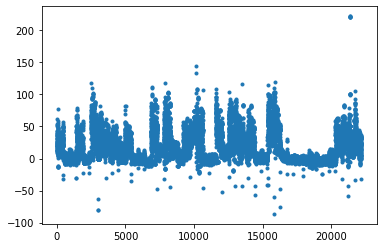

In [148]:
plt.plot(df.time_delta,df.num_crimes - preds,'.')

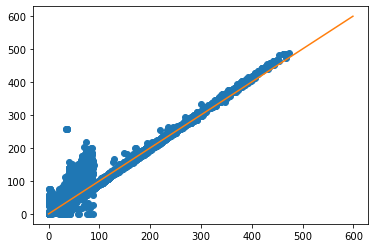

In [149]:
plt.plot(preds,df.num_crimes,'o')
xr = np.arange(0,600)
plt.plot(xr,xr)

In [150]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.num_crimes,preds)

785.352578984207

In [151]:
df.time_delta.values

array([    0,     1,     2, ..., 22188, 22189, 22190])

In [155]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(df.time_delta.values,df.num_crimes, statistic='median')

In [156]:
xr = np.arange(len(df)+1)

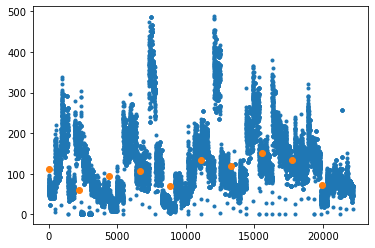

In [157]:
plt.plot(df.time_delta,df.num_crimes,'.')
plt.plot(edges[:-1],s,'o')

In [168]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(df.time_delta.values,df.num_crimes - preds, statistic='mean',
                               bins = np.arange(0,max(df.time_delta),365))

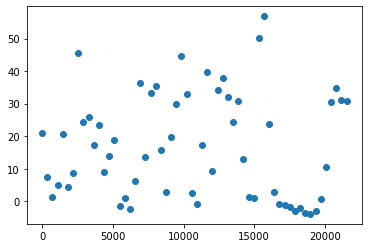

In [169]:
plt.plot(edges[:-1],s,'o')